In [1]:
import sys
sys.path.append('/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch')
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from essentials import complete_preprocessing_pipeline
from feature_sets_center_less import GenerateFeatures 
import copy

In [2]:
with open('/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/data/df_dict_imu.pkl', 'rb') as f:
    imu_dict = pickle.load(f)
with open('/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/data/df_minze_dict.pkl', 'rb') as f:
    ground_truth_dict = pickle.load(f)
with open('/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/data/df_dict_urineestimate_method1.pkl', 'rb') as f:
    urine_estimate_dict = pickle.load(f)

In [3]:
del imu_dict['subj_9_void4']
del imu_dict['subj_11_void2']

#### Three class

In [4]:
data_dict = copy.deepcopy(imu_dict)
labelled_imu_dict = complete_preprocessing_pipeline(data_dict, ground_truth_dict, 
                                target_fs=60,normalize_data=True, use_three_classes=True)

Step 1: Resampling data to 60 Hz...


  0%|          | 0/41 [00:00<?, ?it/s]

Step 2: Processing each instance: 100%|██████████| 41/41 [00:00<00:00, 377.77it/s]


In [5]:
pre_void_count = 0
post_void_count = 0
void_count = 0
total = 0
for exp_id, imu_data in enumerate(labelled_imu_dict.keys()):
            df = labelled_imu_dict[imu_data]
            # print(f"{imu_data}: {df['label'].value_counts().to_dict()}")
            # Sum the number of occurrences of each label
            label_counts = df['label'].value_counts().to_dict()
            total_counts = sum(label_counts.values())
            pre_void_count += label_counts.get('pre-void')
            post_void_count += label_counts.get('post-void')
            void_count += label_counts.get('void')
            total += total_counts
            
print(pre_void_count, post_void_count, void_count)
print(total)
# # Calculate overall percentages
            
total = pre_void_count + post_void_count + void_count
print(f"Total Pre-void: {pre_void_count} ({(pre_void_count/total)*100:.2f}%)")
print(f"Total Post-void: {post_void_count} ({(post_void_count/total)*100:.2f}%)")
print(f"Total Void: {void_count} ({(void_count/total)*100:.2f}%)")

33262 54178 57786
145226
Total Pre-void: 33262 (22.90%)
Total Post-void: 54178 (37.31%)
Total Void: 57786 (39.79%)


### Two class

In [6]:
data_dict = copy.deepcopy(imu_dict)
labelled_imu_dict = complete_preprocessing_pipeline(data_dict, ground_truth_dict, 
                                target_fs=60,normalize_data=True, use_three_classes=False)

Step 1: Resampling data to 60 Hz...


  0%|          | 0/41 [00:00<?, ?it/s]

Step 2: Processing each instance: 100%|██████████| 41/41 [00:00<00:00, 301.80it/s]


In [7]:
non_void_count = 0
void_count = 0
total = 0
for exp_id, imu_data in enumerate(labelled_imu_dict.keys()):
            df = labelled_imu_dict[imu_data]
            label_counts = df['label'].value_counts().to_dict()
            total_counts = sum(label_counts.values())
            
            non_void_count += label_counts.get('non-void')
            void_count += label_counts.get('void')
            total += total_counts
            
print(non_void_count, void_count)
print(total)
# # Calculate overall percentages
            
total = non_void_count  + void_count
print(f"Total Non-void: {non_void_count} ({(non_void_count/total)*100:.2f}%)")
print(f"Total Void: {void_count} ({(void_count/total)*100:.2f}%)")

87440 57786
145226
Total Non-void: 87440 (60.21%)
Total Void: 57786 (39.79%)


In [8]:
# plot a pie chart of the class distribution
labels = ['Non-void', 'Void']
sizes = [non_void_count, void_count]
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)  # explode the 1st slice



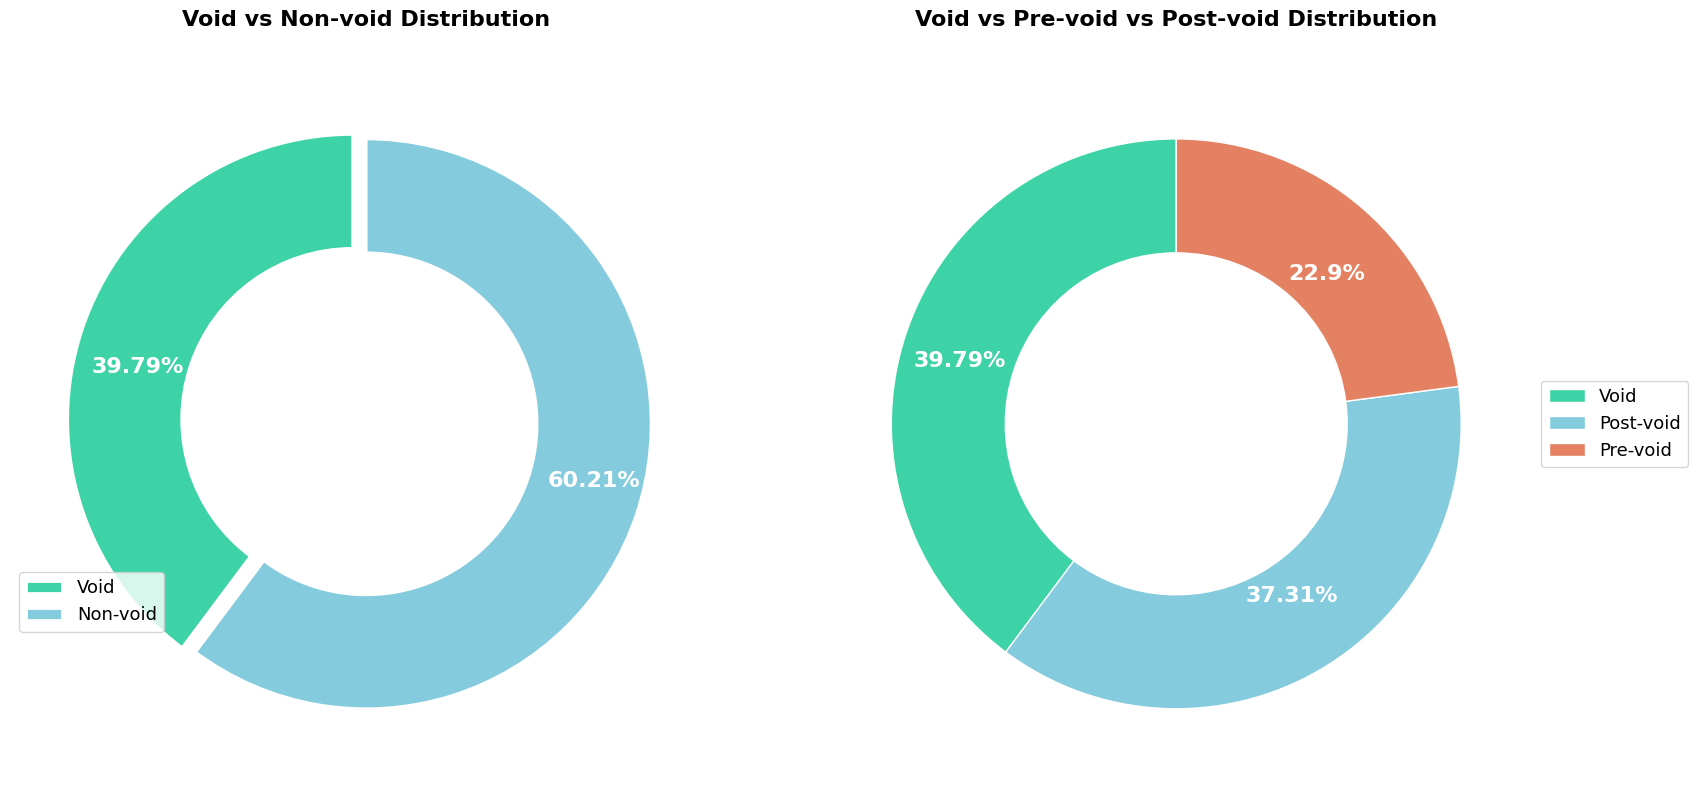

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Alternative: More polished version with better styling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.patch.set_facecolor('white')

# Chart 1 - Enhanced version
sizes1 = [39.79, 60.21]
labels1_sample = ['Void', 'Non-void', ]
colors1 = ["#3DD3A6", "#84CBDD"]
explode1 = (0.05, 0)  # Slightly separate the slices

wedges1, texts1 = ax1.pie(sizes1, explode=explode1, colors=colors1, 
                         startangle=90, wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2),
                         textprops={'fontsize': 12})



# Percentage labels
ax1.text(-0.8, 0.2, '39.79%', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')
ax1.text(0.8, -0.2, '60.21%', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')

ax1.set_title('Void vs Non-void Distribution', 
              fontsize=16, fontweight='bold', pad=30)

ax1.legend(labels1_sample, loc="center left", fontsize=13, bbox_to_anchor=(0, 0, 0.5, 0.5))


# Chart 2 - Enhanced version (3 classes)
sizes2_sample = [39.79, 37.31, 22.90]
labels2_sample = ['Void', 'Post-void', 'Pre-void']
colors2_enhanced = ['#3DD3A6', '#84CBDD', "#e48162"]

wedges2, texts2 = ax2.pie(sizes2_sample, colors=colors2_enhanced, startangle=90, 
                         wedgeprops=dict(width=0.4, edgecolor='white', linewidth=1))



# Add percentage labels
for i, (wedge, size) in enumerate(zip(wedges2, sizes2_sample)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.8 * np.cos(np.radians(angle))
    y = 0.7 * np.sin(np.radians(angle))
    ax2.text(x, y, f'{size}%', ha='center', va='center', 
            fontsize=16, fontweight='bold', color='white')

# Create a more compact legend
legend_labels = [f'{label}: {size}%' for label, size in zip(labels2_sample, sizes2_sample)]
ax2.legend(wedges2, labels2_sample, loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13)

ax2.set_title('Void vs Pre-void vs Post-void Distribution', fontsize=16, fontweight='bold', pad=30)

filename = '/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/images/class_distribution_pie_chart.png'
plt.savefig(filename)

plt.tight_layout()
plt.show()